In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [6]:
file_index= np.arange(1,9)
print(file_index)
data_files = []
for i in file_index:
    data_files.append(pd.read_csv('clean_subject'+str(i)+'.csv'))
print(data_files)

[1 2 3 4 5 6 7 8]
[       Unnamed: 0  Time:512Hz  Epoch  Electrode  Event Id
0            7680   15.000000    240       -5.0       0.0
1            7681   15.001953    240       36.0       0.0
2            7682   15.003906    240       67.0       0.0
3            7683   15.005859    240       52.0       0.0
4            7684   15.007812    240        8.0       0.0
5            7685   15.009766    240        9.0       0.0
6            7686   15.011719    240       18.0       0.0
7            7687   15.013672    240       83.0       0.0
8            7688   15.015625    240      144.0       0.0
9            7689   15.017578    240      107.0       0.0
10           7690   15.019531    240       71.0       0.0
11           7691   15.021484    240       81.0   33552.0
12           7692   15.023438    240       55.0       0.0
13           7693   15.025391    240       34.0       0.0
14           7694   15.027344    240       54.0       0.0
15           7695   15.029297    240       70.0      

(82944,)
(61952,)
(108640,)
(113952,)
(502112,)
(127776,)
(116768,)
(151552,)


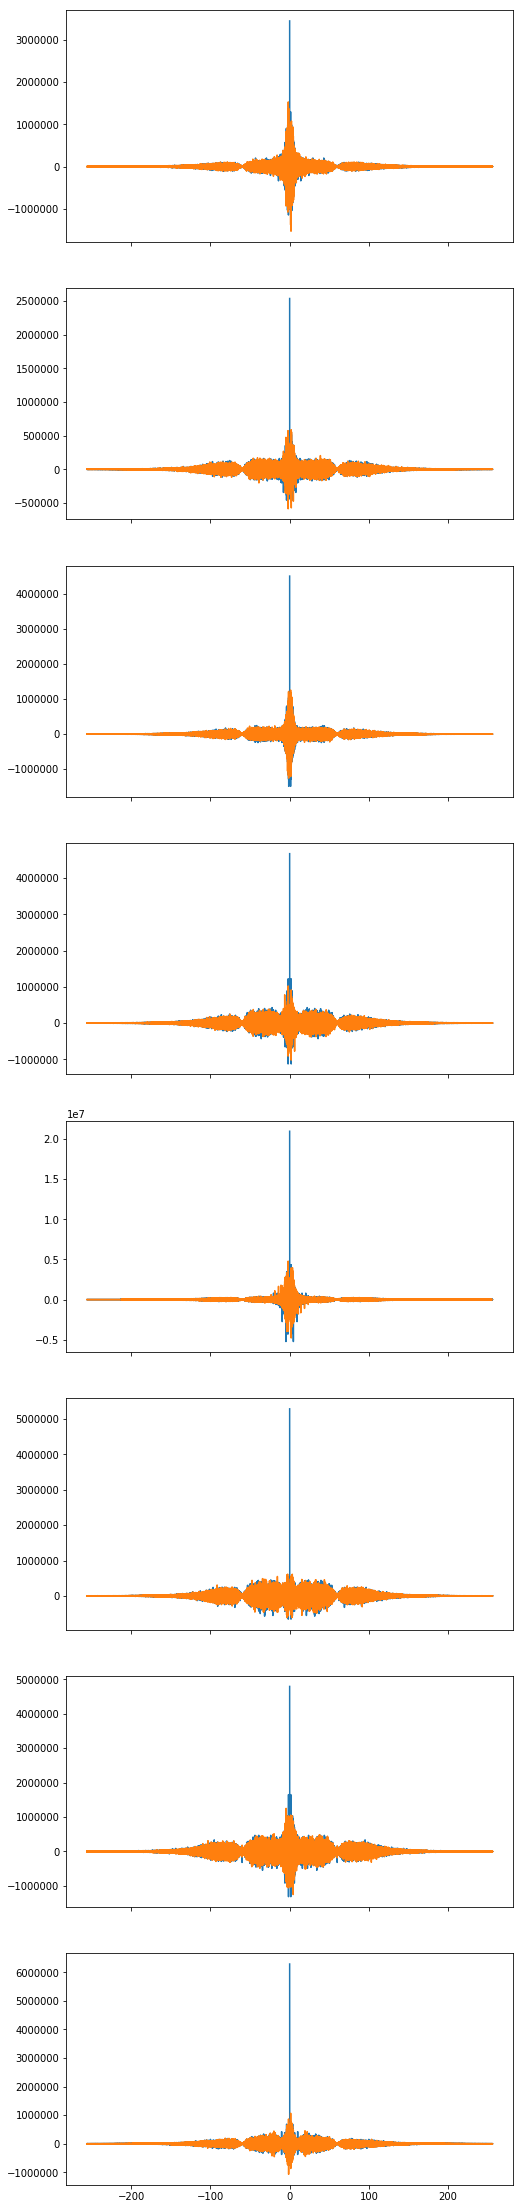

In [18]:
fft_data = []
fft_freq = []
for ind in file_index:
    fft_data.append(np.fft.fft(data_files[ind-1]['Electrode']))
    print(data_files[ind-1]['Electrode'].shape)
    fft_freq.append(np.fft.fftfreq(data_files[ind-1]['Electrode'].shape[0], 1/512))
f, axes = plt.subplots(8,1, sharex=True, figsize=(8,40))
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], fft_data[ind-1].real, fft_freq[ind-1], fft_data[ind-1].imag)
plt.show()


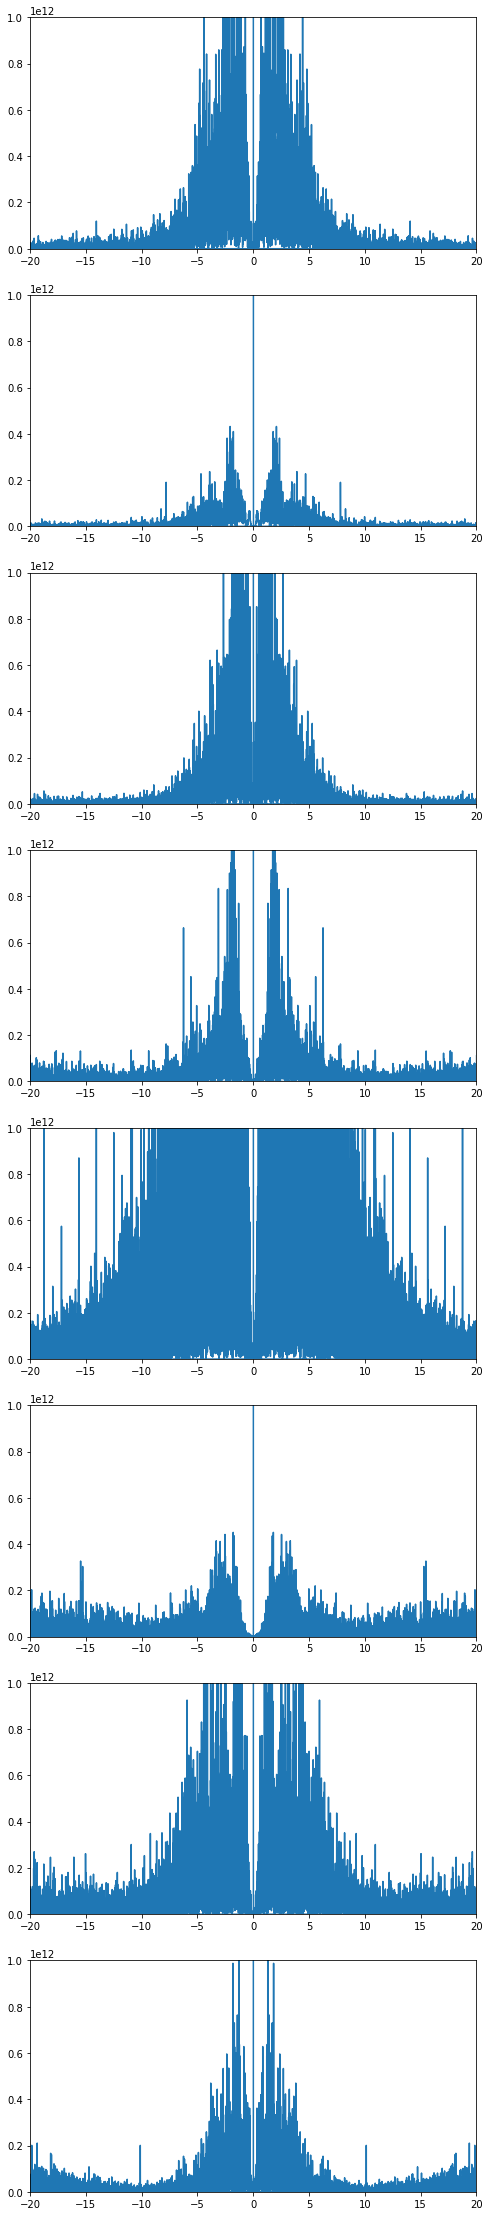

In [31]:
f, axes = plt.subplots(8,1, figsize=(8,40))
for ind in file_index:
    axes[ind-1].plot(fft_freq[ind-1], np.abs(fft_data[ind-1])**2)
    axes[ind-1].set_xlim(-20,20)
    axes[ind-1].set_ylim(-5,1000000000000)
plt.show()

In [22]:
print(fft_freq[0])
print(fft_freq[0].shape)

[ 0.          0.00617284  0.01234568 ..., -0.01851852 -0.01234568
 -0.00617284]
(82944,)
